# 3 Artist 模块

Matplotlib应用接口包含三层：FigureCanvas、Renderer和Artist。其中FigureCanvas是绘制图形时的作用区域；Renderer知道怎么在FigureCanvas上画图；Artist知道怎么使用render在画布谁给你绘制图形。FigureCanvas和render负责处理底层工具包交换信息的细节。Artist模块在更高的层次上绘制图形，如文本、线条等。一般用户95%的时间都在使用Artist模块上进行工作。

## 3.1 Artist 模块概述

1. 基本Artist
  在画布上绘制的标准元素对象，如Line2D、Rectangle、Text、AxesImage等。
2. 容器Artist
  是用来存放上面元素的，如 Axes、Axies、Figure等。
在使用subplot()函数添加子图的时候，会自动创建一个Figure实体。

绘图步骤：
  - 使用figure()床架一个Figure实体
  - 使用这个实体创建一个或者对个Axes或者Subplot实体。
  - 使用Axes实体的方法来创建基本的图形元素

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

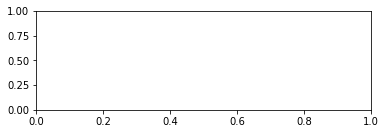

In [2]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)  #2行 1列 第一张子图

Axes是Matplotlib应用层最重要的对象，大多数时间多会用到它。Axes有很多函数（如plot()、text()、his()、imshow()等）来创建一些基本的图形元素（Line2D、Rectangle、Text）。大家比较熟悉的subplot()函数其实就是Axes的一个特例，它用于创建一个规则的Subplot实体。如果想创建一个任意位置的Axes，则可以使用add_axes()函数，并传递一个表示图形相对位置的列表作为参数。

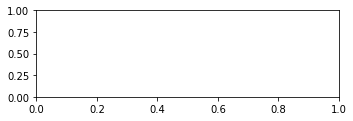

In [3]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])

ax是fig.add_subplot()函数创建的一个Axes实体。在使用ax.plot()函数的时候会创建一个Line2D实体，并把它放到Axes.lines列表中。

In [4]:
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color="blue", lw=2)

In [5]:
ax.lines

In [6]:
line

可以使用下面的任意一种方式删除实体。

In [7]:
del ax.lines[0]
#ax.lines.remove(line)

Axes对象包含一些其他函数来装饰x、y轴，比如坐标标签、标记等。

In [8]:
xtext = ax.set_xlabel('my xlabel')  #返回一个Text实体
ytext = ax.set_ylabel('my ylabel')

In [9]:
xtext, ytext

(Text(0.5, 3.200000000000017, 'my xlabel'),
 Text(3.200000000000003, 0.5, 'my ylabel'))

当调用ax.set_xlabel()函数的时候，它会把文本信息传递到Axes容器当中。

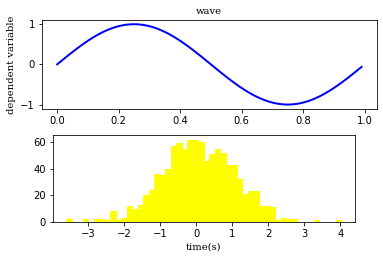

In [10]:
import matplotlib.font_manager as fm
font = fm.FontProperties(fname="/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf")

fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('dependent variable', fontproperties=font)
ax1.set_title('wave', fontproperties=font)
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)
np.random.seed(19680801) # 随机数种子
ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3]) # 添加一个axes对象
# 使用hist函数绘制图形
n, bins, patches = ax2.hist(np.random.randn(1000), 50, facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('time(s)', fontproperties=font)
plt.show()

## 3.2 Artist 的属性



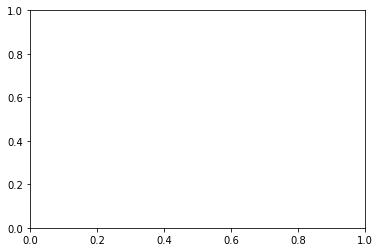

In [11]:
ax = plt.subplot()

In [12]:
mpl.artist.getp(ax)

    adjustable = box
    agg_filter = None
    alpha = None
    anchor = C
    animated = False
    aspect = auto
    autoscale_on = True
    autoscalex_on = True
    autoscaley_on = True
    axes_locator = None
    axisbelow = line
    children = [<matplotlib.spines.Spine object at 0x7f8366635cf8...
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_ratio = 1.0
    default_bbox_extra_artists = [<matplotlib.spines.Spine object at 0x7f8366635cf8...
    facecolor = (1.0, 1.0, 1.0, 1.0)
    fc = (1.0, 1.0, 1.0, 1.0)
    figure = Figure(432x288)
    frame_on = True
    geometry = (1, 1, 1)
    gid = None
    gridspec = GridSpec(1, 1)
    images = <a list of 0 AxesImage objects>
    in_layout = True
    label = 
    legend = None
    legend_handles_labels = ([], [])
    lines = <a list of 0 Line2D objects>
    navigate = True
    navigate_mode = None
    path_effects = []
    picker = None
    position = Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88)
    ras

最大的容器是matplotlib.figure.Figure，它包含图形的所有元素。当使用add_subplot()或者add_axes()方法的时候，这些对象会被加入到Figure.Axes中 ；在使用方法创建他们的时候，它们会作为方法的返回值返回。

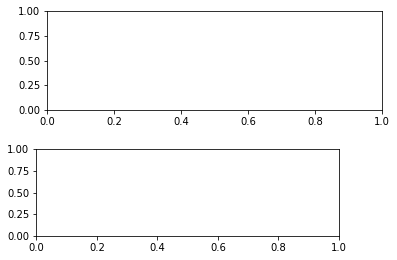

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])

In [14]:
ax1, ax2

(<matplotlib.axes._subplots.AxesSubplot at 0x7f836646a4a8>,
 <matplotlib.axes._axes.Axes at 0x7f836648d940>)

In [15]:
print(fig.axes)

[<matplotlib.axes._subplots.AxesSubplot object at 0x7f836646a4a8>, <matplotlib.axes._axes.Axes object at 0x7f836648d940>]


In [16]:
for ax in fig.axes:
    ax.grid(True)

matplotlib.axes.Axes是 matplotlib 的核心，它包含了图形的多数元素。

In [17]:
rect = ax.patch  #矩形实体
rect.set_facecolor('green')

In [18]:
ax.get_facecolor()

(0.0, 0.5019607843137255, 0.0, 1.0)

当使用plot()函数的时候会创建线条实体。并且将这个线条实体添加到Axes.lines容器中，以及返回这个线条实体。 

In [19]:
x, y = np.random.rand(2, 100)
line, = ax.plot(x, y, "-", color="blur", lw = 2)

像bar()一类函数会创建一系列矩形，并添加到Axes.patches中。 

matplotlib.axes.Tick是最小的容器，它包含标记、标记线和标记位置。可以设置坐标轴标记的颜色和位置。 

# 4 使用pandas绘图

pandas把Matplotlib的一些基础绘图功能包裹起来，提供了简捷的接口；并且pandas的数据结构包含标签和索引信息。

序列和边框都有一个plot()函数。

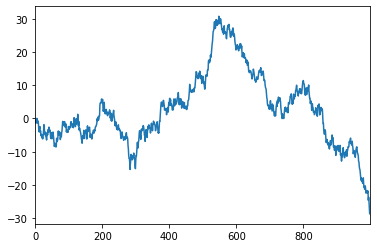

In [20]:
ts = pd.Series(np.random.randn(1000))
index = pd.date_range('1/1/2000', periods=1000)

#累计求和
ts = ts.cumsum()
ts.plot()

数据框的plot()在一张子图上绘制多个线条。 图例根据各列数据自动生成。

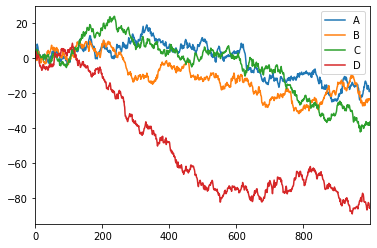

In [21]:
df = pd.DataFrame(np.random.randn(1000, 4), index = ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot()

柱状图。 

In [22]:
df = pd.DataFrame(np.random.rand(5, 4), index = list("ABCDE"), columns=pd.Index(list('1234')))
df

,1,2,3,4
A,0.679367,0.560769,0.665517,0.974464
B,0.100272,0.766536,0.214854,0.896484
C,0.409959,0.118137,0.487354,0.654834
D,0.585841,0.251351,0.351758,0.758968
E,0.426331,0.937288,0.803024,0.715998


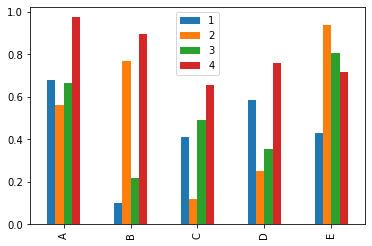

In [23]:
df.plot(kind="bar")

箱图。直观的看数据范围。 

In [24]:
df = pd.Series(np.random.rand(10), name="A")
df

0    0.563602
1    0.542605
2    0.384100
3    0.355232
4    0.216324
5    0.801443
6    0.379366
7    0.337925
8    0.674523
9    0.857754
Name: A, dtype: float64

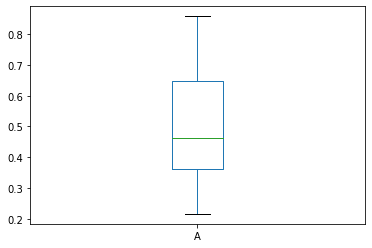

In [25]:
df.plot.box()

In [26]:
df = pd.DataFrame(np.random.rand(10, 5), columns=list('ABCDE'))
df

,A,B,C,D,E
0,0.773456,0.799743,0.807628,0.223832,0.423231
1,0.733535,0.486238,0.975912,0.687537,0.700237
2,0.636907,0.314064,0.561459,0.427361,0.699711
3,0.653825,0.046649,0.243906,0.151479,0.834677
4,0.227334,0.049894,0.452812,0.251763,0.407205
5,0.741242,0.963882,0.056728,0.066314,0.493951
6,0.866557,0.573539,0.543373,0.774891,0.690933
7,0.531032,0.668578,0.954497,0.246051,0.406529
8,0.745300,0.532699,0.414407,0.741283,0.817129
9,0.531810,0.862311,0.781229,0.769566,0.044764


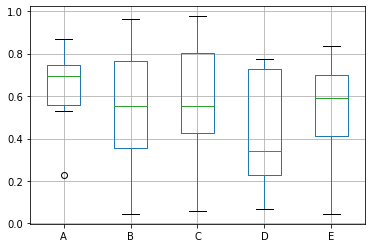

In [27]:
df.boxplot()